# DEF-D Fysieke Ontwerpopdracht 1 invul template

## Groepsgegevens en planning 

Aan het einde van deze ontwerpopdracht lever je als groep dit notebook gezamenlijk in via een pull request op Github en lever je een link naar dit pull request in op Brightspace. Zet jullie studienummers en namen in onderstaande tabel zodat wij zeker weten dat het groepsvormen goed is gegaan. Werk in de juiste branch.

| Groep: 53     |  |
| :-------------|:-------------|
| Alejandro Jean| 6270611|
| Belén de Glas| 6574297 |
| Eline Serpenti| 6506690 |

| Planning Groep: 53     |Tijdstip / Tijdspanne  |
|---|---|
| Mijlpaal 1: Criteria opgesteld | 12:30 |
|Meetplan| 14:00 - 14:30|
| Mijlpaal 2: Eerste kalibratie meting gedaan| 15:30 |
| Pauze 1| 12:45 - 13:45 |
| Pauze 2| 16:00 - 16:15 |

## *Opdracht 1*: Foto van alle schetsen.

Zet de foto in dezelfde map als dit notebook en verander hieronder de naam in de naam van de foto.

![Alt](Toepass_Schets_18_02.jpeg "analyse: ideeen")

## *Opdracht 2*, MIJLPAAL, Leerdoel
Vul onderstaande tabel in en geef aan met welke sensor je verder gaat.** Laat dit aan je TA zien.** Als je TA druk is: ga wel ondertussen door met de volgende stap.

| Sensor | Toepassing | Criteria |
|:---|:---|:---|
|krachtsensor | Verschil tussen een licht voorwerp op de sensor en geen voorwerp | Het regristeert een voorwerp van 0 - 10 gram. |
|krachtsensor | Verschil tussen een licht voorwerp op de sensor en geen voorwerp |  De waarde blijft stabiel dus een maximale afwijking van 0.1 gram. |
|tempsensor | Vergelijking temperatuur van verhit metale blokje en onverwarmd metale blokje | Temperaturen tussen de 20 en 60 graden celsius meten. |
|tempsensor | Vergelijking temperatuur van verhit metale blokje en onverwarmd metale blokje | Een resolutie van 1 graden celsius. |
|LDR | Verschil tussen de lichtsterkte in een gesloten doos en het lokaal | Verschil van minimaal 10 lux tussen de waarden, zodat het verschil duidelijk is. |
|LDR | Verschil tussen de lichtsterkte in een gesloten doos en het lokaal |  De doos moet goed gesloten zijn, met een gemeten lux-waarde kleiner dan 20 lux. |
|LDR | Verschil tussen de lichtsterkte in een gesloten doos en het lokaal | Een bereik van 0 - 7000 lux. |


Groep 53 heeft gekozen voor sensor LDR. 

## *Opdracht 3*: Foto van de schets van jouw meetopstelling in.
Licht kort toe wat er in de foto te zien is.
 ![Alt](Opst_Schets_18_02.jpeg "schets student")

## *Opdracht 4*: Beantwoord de vragen

1. Welke variabelen ga je veranderen? 
* De lichtsterkte
2. Over welk bereik ga je deze variabelen veranderen?
* 0 - 10000 lux, in stappen van 1000 lux
3. Wat ga je allemaal meten?
* De spanning over de weerstand en de lichtsterkte.
4. Hoeveel metingen ga je doen?
* Tien metingen
5. Ga je met deze keuzes kunnen evalueren of jouw sensor geschikt is voor de gekozen toepassingen?
* Ja, hiermee kunnen we bepalen of het verschil in lichtsterkte goed te meten is. Een LDR heeft een groot bereik en kan het verschil tussen volledig donker en volle zon goed registreren. Zoals in de schets van de meetopstelling te zien is, heb je alleen een weerstand in het circuit nodig. Dit zorgt ervoor dat deze toepassing goedkoop uitvoerbaar is.  

### Meetplan:
De telefoon wordt in de doos gezet om de lichtsterkte te bepalen. Dit doen we ook met de LDR. Vervolgens wordt er ook een meting gedaan met zowel de LDR als de telefoon bij het raam, in de schaduw in het lokaal en er wordt een meting gedaan door de sensor van de telefoon en LDR volledig te bedekken met een vinger. 

De telefoon in lux, de Arduino geeft de spanning die over de weerstand (op punt A0) gaat in bits.

## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
Licht kort toe wat er in de foto te zien is.
 ![Alt](Meet_1_18_02.jpeg "meetopstelling student")
 ![Alt](Meet_2_18_02.jpeg "meetopstelling student")

## *Opdracht 6*: Meten en fitten, Leerdoel

In [20]:
# Zet hier jouw data in een voor jou handig formaat
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

tel = np.array([0, 930, 2055, 2995, 4010, 5025, 6015, 6985, 8035, 9050])
u_tel = 46
LDR = np.array([0, 226, 307, 356, 413, 440, 450, 468, 488, 508])
u_LDR = 8

270.58226786422597


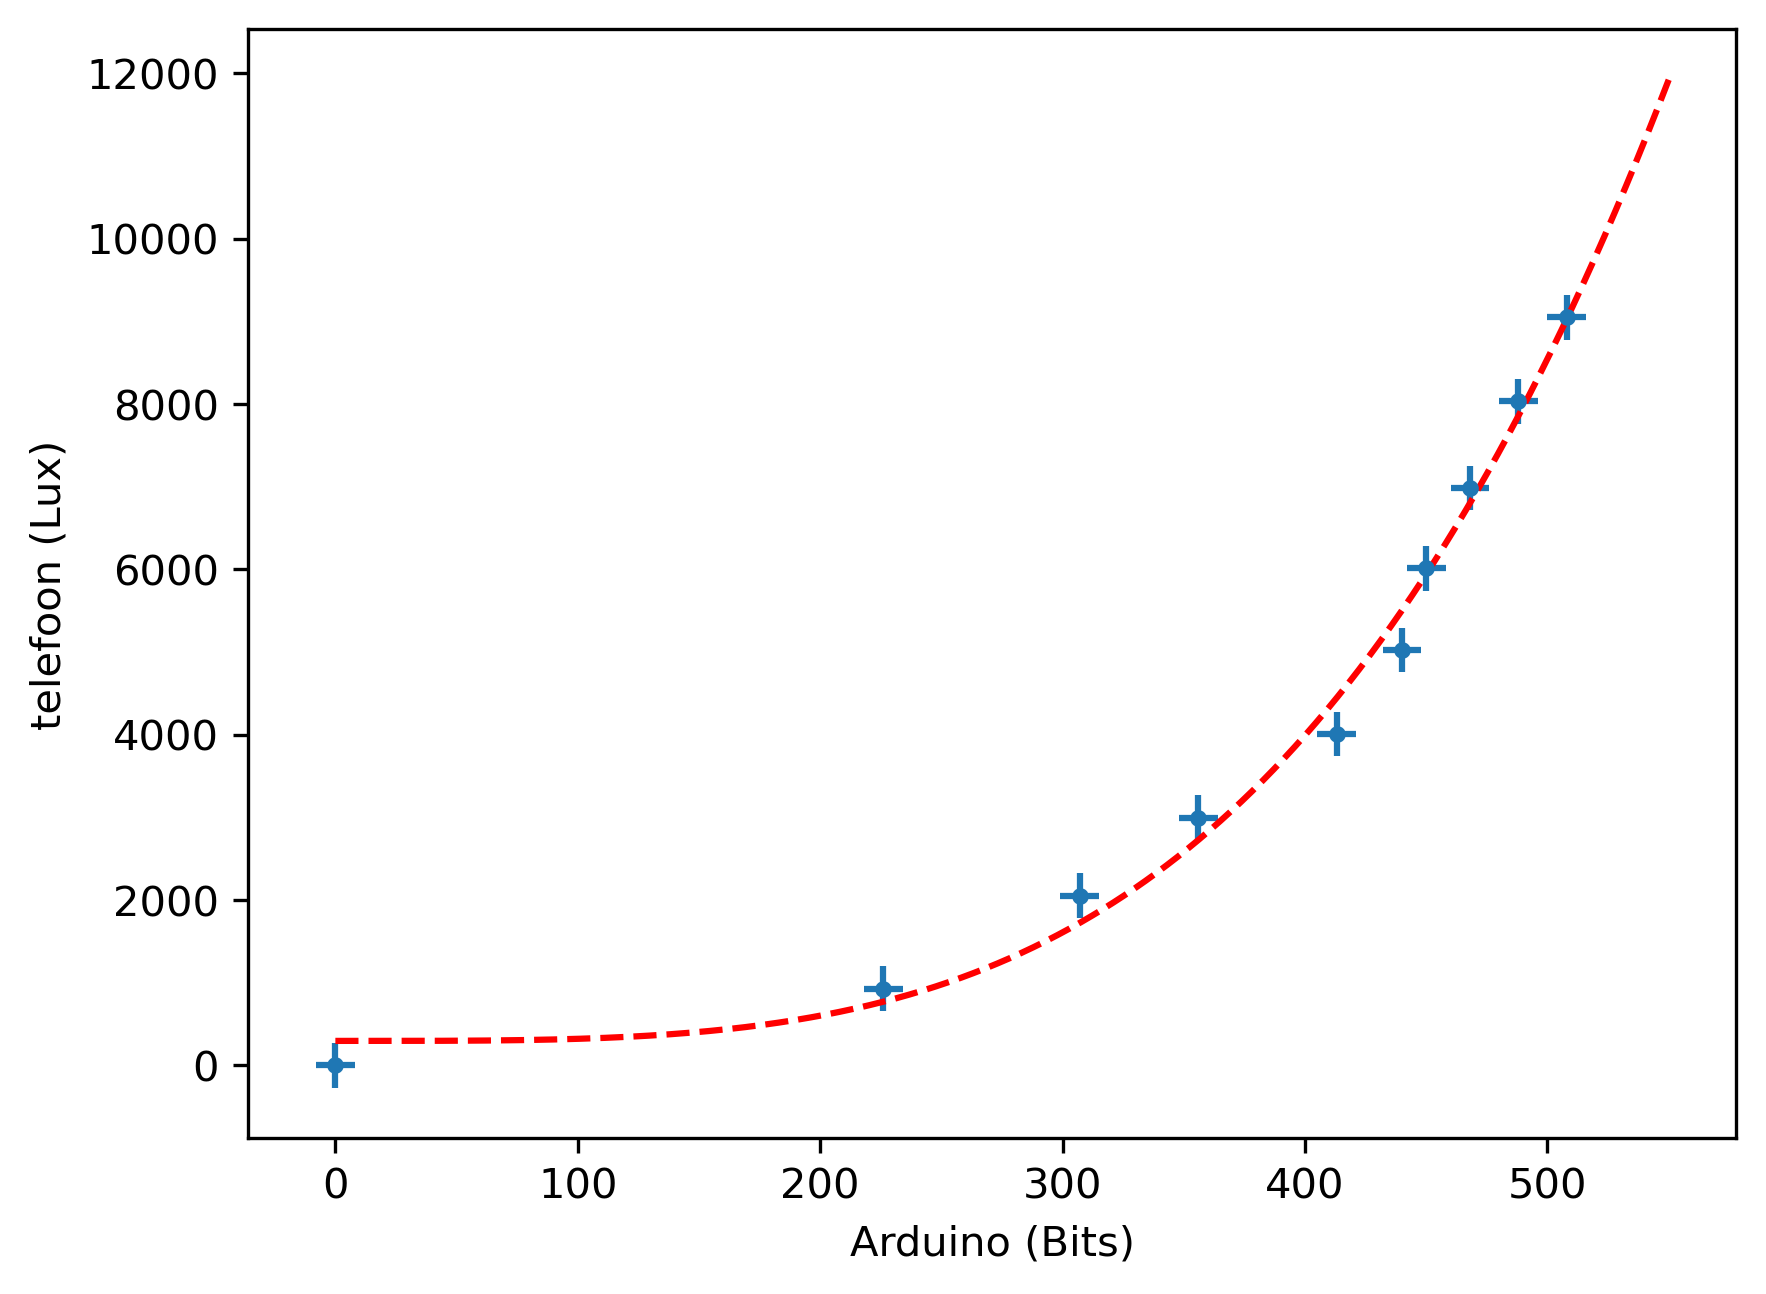

In [48]:
# Plot hier de meting en fit een lijn door de metingen.

def fitfunctie(x, a, b,c):
    return a * x**b +c

x_test = np.linspace(0, 550, 1000)

popt, pcov = curve_fit(fitfunctie, LDR, tel)
u_y = np.sqrt(pcov[2,2])
print(u_y)

# Maak gebruik van wat je geleerd hebt bij het practicum.
%matplotlib inline
plt.figure(dpi=300)
plt.errorbar(LDR, tel, yerr=u_y, xerr=u_LDR, fmt='.')
plt.plot(x_test, fitfunctie(x_test, *popt), 'r--')
plt.xlabel('Arduino (Bits)')
plt.ylabel('telefoon (Lux)')
# plt.yscale('log')
plt.show()

## *Opdracht 7*: Iteratie nodig?

Nee, er is geen iteratie van de meetgegevens nodig. De curve-fit laat een betrouwbaar machtsverband zien. Ook is er te zien dat het verschil tussen het aantal bits van de meting in de doos en de meting in het lokaal telkens groter is dan het onzekerheidsinterval van elke meting. Dit betekent dus dat er duidelijk te zien is wanneer de LDR zich in de doos bevindt en wanneer niet. Ook is het gevonden verband geldig binnen de range van de metingen binnen en buiten de doos. 

## *Opdracht 8*: Conclusie, leerdoel

Het verschil tussen de lichtsterkte in een gesloten doos en een lokaal is wel te bepalen met onze sensor en opstelling. Dit is duidelijk te zien aan onze plot en fit, omdat  het verschil tussen het aantal bits van de meting in de doos en de meting in het lokaal telkens groter is dan het onzekerheidsinterval van elke meting. Dit betekent dus dat er duidelijk te zien is wanneer de LDR zich in de doos bevindt en wanneer niet. Ook is het gevonden verband geldig binnen de range van de metingen binnen en buiten de doos. 

## *Opdracht 9*: Aantonen leerdoelen beheersing

Om aan te tonen dat je de leerdoelen beheerst, kopieer je hieronder alle cellen met 'leerdoel' in de titel. Zet zelf de cellen onder de goede kopjes. Mogelijk komt een cel bij meerdere leerdoelen terug.

### Leerdoel 1: Simpele circuits (RC-circuit, spanningsdelers met sensoren) ontwerpen en fabriceren.

Kopieer hier de cel(len) waaruit blijkt dat jullie leerdoel 1 beheersen.

## *Opdracht 3*: Foto van de schets van jouw meetopstelling in.
Licht kort toe wat er in de foto te zien is.
 ![Alt](Opst_Schets_18_02.jpeg "schets student")

### Leerdoel 2: Ontwerpeisen voor een opdracht SMART opstellen en vervolgens de ontwerpcyclus inrichten, rekening houdend met de randvoorwaarde van de opdracht.

Kopieer hier de cel(len) waaruit blijkt dat jullie leerdoel 2 beheersen.

## *Opdracht 2*, MIJLPAAL, Leerdoel
Vul onderstaande tabel in en geef aan met welke sensor je verder gaat.** Laat dit aan je TA zien.** Als je TA druk is: ga wel ondertussen door met de volgende stap.

| Sensor | Toepassing | Criteria |
|:---|:---|:---|
|krachtsensor | Verschil tussen een licht voorwerp op de sensor en geen voorwerp | Het regristeert een voorwerp van 0 - 10 gram. |
|krachtsensor | Verschil tussen een licht voorwerp op de sensor en geen voorwerp |  De waarde blijft stabiel dus een maximale afwijking van 0.1 gram. |
|tempsensor | Vergelijking temperatuur van verhit metale blokje en onverwarmd metale blokje | Temperaturen tussen de 20 en 60 graden celsius meten. |
|tempsensor | Vergelijking temperatuur van verhit metale blokje en onverwarmd metale blokje | Een resolutie van 1 graden celsius. |
|LDR | Verschil tussen de lichtsterkte in een gesloten doos en het lokaal | Verschil van minimaal 10 lux tussen de waarden, zodat het verschil duidelijk is. |
|LDR | Verschil tussen de lichtsterkte in een gesloten doos en het lokaal |  De doos moet goed gesloten zijn, met een gemeten lux-waarde kleiner dan 20 lux. |
|LDR | Verschil tussen de lichtsterkte in een gesloten doos en het lokaal | Een bereik van 0 - 7000 lux. |


Groep 53 heeft gekozen voor sensor LDR. 

### Meetplan:
De telefoon wordt in de doos gezet om de lichtsterkte te bepalen. Dit doen we ook met de LDR. Vervolgens wordt er ook een meting gedaan met zowel de LDR als de telefoon bij het raam, in de schaduw in het lokaal en er wordt een meting gedaan door de sensor van de telefoon en LDR volledig te bedekken met een vinger. 

De telefoon in lux, de Arduino geeft de spanning die over de weerstand (op punt A0) gaat in bits.

### Leerdoel 3: Voor een gegeven sensor & analoog-digitaal convertor en gegeven (of zelf gekozen) toepassing een kalibratie meting ontwerpen, inclusief het circuit om de sensor aan te sluiten op de analoog-digitaal convertor, de opstelling bouwen, en meetresultaten verwerken en concluderen of de combinatie van sensor en analoog-digitaal conversie geschikt is voor de toepassing.

Kopieer hier de cel(len) waaruit blijkt dat jullie leerdoel 3 beheersen.

## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
Licht kort toe wat er in de foto te zien is.
 ![Alt](Meet_1_18_02.jpeg "meetopstelling student")
 ![Alt](Meet_2_18_02.jpeg "meetopstelling student")

270.58226786422597


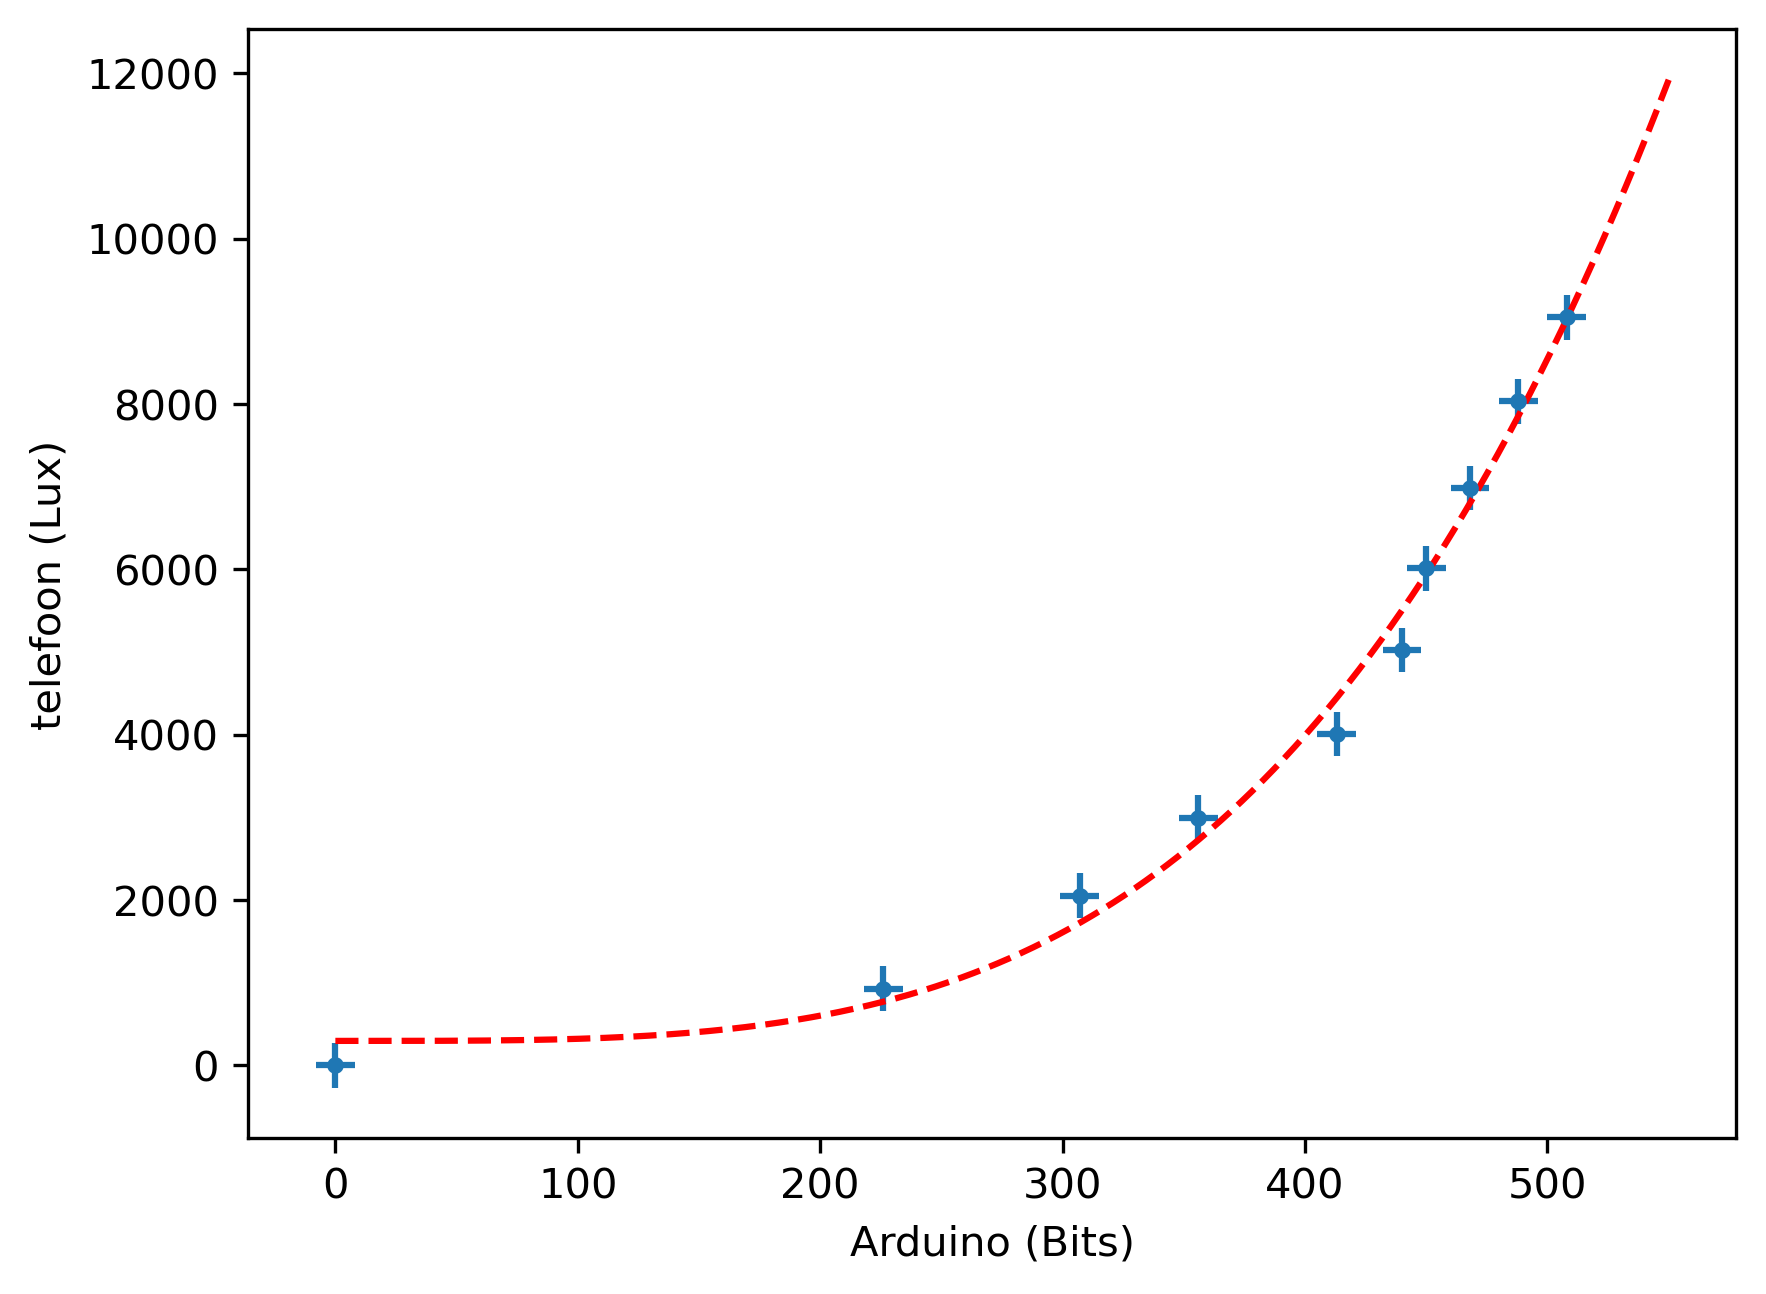

In [ ]:
# Plot hier de meting en fit een lijn door de metingen.

def fitfunctie(x, a, b,c):
    return a * x**b +c

x_test = np.linspace(0, 550, 1000)

popt, pcov = curve_fit(fitfunctie, LDR, tel)
u_y = np.sqrt(pcov[2,2])
print(u_y)

# Maak gebruik van wat je geleerd hebt bij het practicum.
%matplotlib inline
plt.figure(dpi=300)
plt.errorbar(LDR, tel, yerr=u_y, xerr=u_LDR, fmt='.')
plt.plot(x_test, fitfunctie(x_test, *popt), 'r--')
plt.xlabel('Arduino (Bits)')
plt.ylabel('telefoon (Lux)')
# plt.yscale('log')
plt.show()